In [25]:
import pandas as pd
base= pd.read_csv('Datasets\MoviesOnStreamingPlatforms.csv')

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\alexa\AppData\Local\Temp\ipykernel_2136\2831299317.py:2: SyntaxWarning: invalid escape sequence '\M'
  base= pd.read_csv('Datasets\MoviesOnStreamingPlatforms.csv')


In [26]:
base.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


Analisis de Datos

In [62]:
cantidad_year = base.groupby(by='Year').count()[['ID']].reset_index()
cantidad_year.columns = ['Year','Amount']
cantidad_year

,Year,Amount
0,1914,1
1,1915,2
2,1916,1
3,1919,1
4,1920,2
...,...,...
98,2017,831
99,2018,945
100,2019,1014
101,2020,862


In [42]:
year = 1980
base_filtrada_year = base[base['Year']==year]

cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
cantidad_year.columns = ['Age','Amount']
cantidad_year

,Age,Amount
0,13+,1
1,18+,10
2,7+,5
3,all,5


In [48]:
def select_characters(n):
    try:
        return n[:2]
    except:
        return 0

# Método 1: Puede tener errores con pelis que tengan 100/100
base['Ranking'] = base['Rotten Tomatoes'].apply(select_characters).astype(int)
# Método 2: Utilizando el método split
base['Ranking'] = base['Rotten Tomatoes'].str.split('/',expand=True)[0].fillna(0).astype(int)

year = 1980
base_filtrada_year = base[base['Year']==year]

base_filtrada_year.sort_values(by='Ranking',ascending=False)[:10][['Title','Age']].reset_index(drop=True)

,Title,Age
0,Star Wars: The Empire Strikes Back,7+
1,The Elephant Man,7+
2,Caddyshack,18+
3,The Long Riders,18+
4,Motel Hell,18+
5,"Bon Voyage, Charlie Brown (and Don't Come Back!)",all
6,Return to the 36th Chamber,18+
7,Clan of the White Lotus,13+
8,The Big Brawl,18+
9,The Jazz Singer,7+


In [64]:
year = 1980
base_filtrada_year=base[base['Year']==year]

base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum()

,Age,Amount
0,13+,1
1,18+,10
2,7+,5
3,all,5


##Generador de Graficos

In [72]:
import altair as alt
years = base[base['Year'] >= 1990]['Year'].unique()
years.sort()
for year in years:
    base_filtrada_year = base[base['Year']==year]
    cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
    cantidad_year.columns = ['Age','Amount']
    cantidad_year['Year'] = year
    if year == years[0]:
        df = cantidad_year
    else:
        df = pd.concat([df,cantidad_year])
df['Year'] = df['Year'].astype(str)
alt.Chart(df).mark_bar().encode(
    x='Year:O',
    y='Amount:Q',
    color='Age:N'
)

alt.Chart(...)

Matplotlib is building the font cache; this may take a moment.


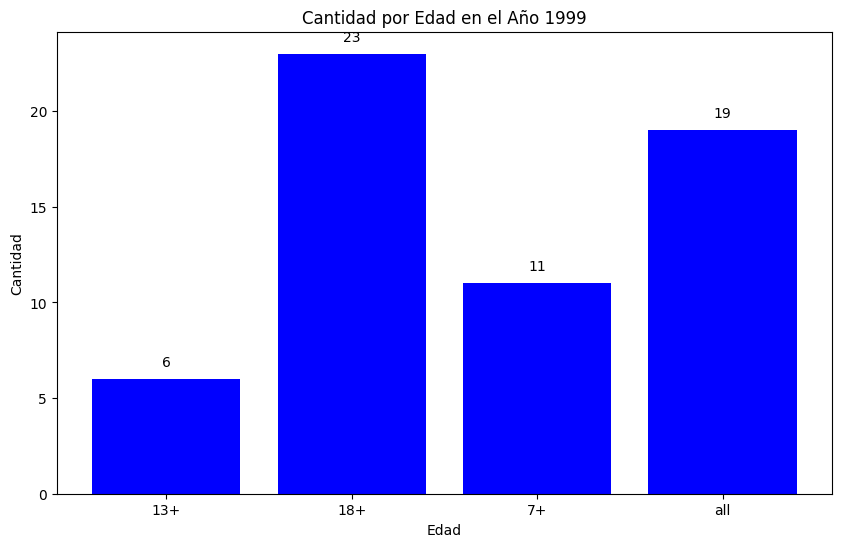

In [76]:
import matplotlib.pyplot as plt

year = 1999
base_filtrada_year = base[base['Year']==year]

cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
cantidad_year.columns = ['Age','Amount']
cantidad_year

# Crear el gráfico de barras usando Matplotlib
plt.figure(figsize=(10, 6))  # Configura el tamaño del gráfico
plt.bar(cantidad_year['Age'], cantidad_year['Amount'], color='blue')  # Crea barras

# Añadiendo título y etiquetas
plt.title('Cantidad por Edad en el Año 1999')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# Mostrar valores en las barras
for i, v in enumerate(cantidad_year['Amount']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.savefig('Images/histogram_age_year.png')
plt.show()

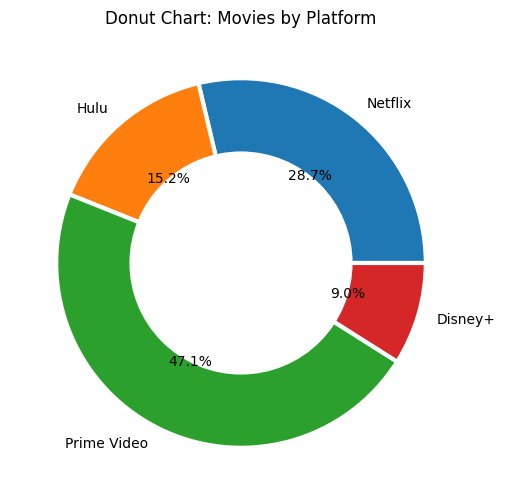

In [77]:

year = 2010
 
base_filtrada_year = base[base['Year']==year]
cantidad_year = base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum().reset_index()
cantidad_year.columns = ['Platform','Amount']
 
plt.figure(figsize=(6, 6))
plt.pie(cantidad_year['Amount'], labels=cantidad_year['Platform'], autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title('Donut Chart: Movies by Platform')
plt.savefig('Images/donuts_platform_year.png')
plt.show()